# Random walk lab

### Learning Objective

The `primary goal` of this notebook is to `use random walks to practice working with NumPy and multi-dimensional data arrays` in the context of an actual simulation.

If you learn anything about random walks or diffusion, that's an added bonus.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# matplotlib configuration
import matplotlib as mpl
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["legend.fontsize"] = 12
mpl.rcParams["figure.figsize"] = (8,6)
# retina display only (e.g. MacOS)
%config InlineBackend.figure_format = 'retina'

## 1D discrete random walk

![](images/random-walk-1d.gif)

* Discrete integer sites
* 1000 identical and independent random walkers
* All walkers start at site 0
* Every time step each walker randomly moves -1, 0, or +1 sites

Let's write a program that simulates the above for 1000 time steps.

What data structure(s) will you use to keep track of all the walker positions for all time steps of the simulation?

Let's use a 1D array that holds the position of each walker. The length of the array will be equal to the number of walkers.

    Walker Position = [ -3, 1, 0, ... ]

In [2]:
numWalkers = 1000

walkers = np.zeros(numWalkers, dtype=int)  # <-- dtype=int

walkers.shape, walkers.dtype

((1000,), dtype('int64'))

How would you get the position of the 3rd walker?

In [3]:
walkers[2]

0

Each time step, we want to add either +1, 0 or -1 to each walker's position.

We could write a for loop that moves each walker one at a time.

In [4]:
print(walkers[:9])

# move all walkers for one time step
for i in range(numWalkers):
    walkers[i] += np.random.choice([-1, 0, 1])

print(walkers[:9])

[0 0 0 0 0 0 0 0 0]
[ 1 -1  0  1  1  1 -1  0 -1]


But there's NumPy!

In [19]:
# reset walkers all to site 0
walkers = np.zeros(numWalkers, dtype=int)

In [25]:
print(walkers[:9])

# move all walkers for one time step
walkers += np.random.choice([-1, 0, 1], size=walkers.shape)

print(walkers[:9])

[ 1  0 -1 -3 -3 -1  1  0 -3]
[ 2 -1  0 -2 -2  0  1  1 -4]


Rerun the above cell several times...

Ok, how can we visualize what's going on?

Let's plot a histogram of all the walkers positions.

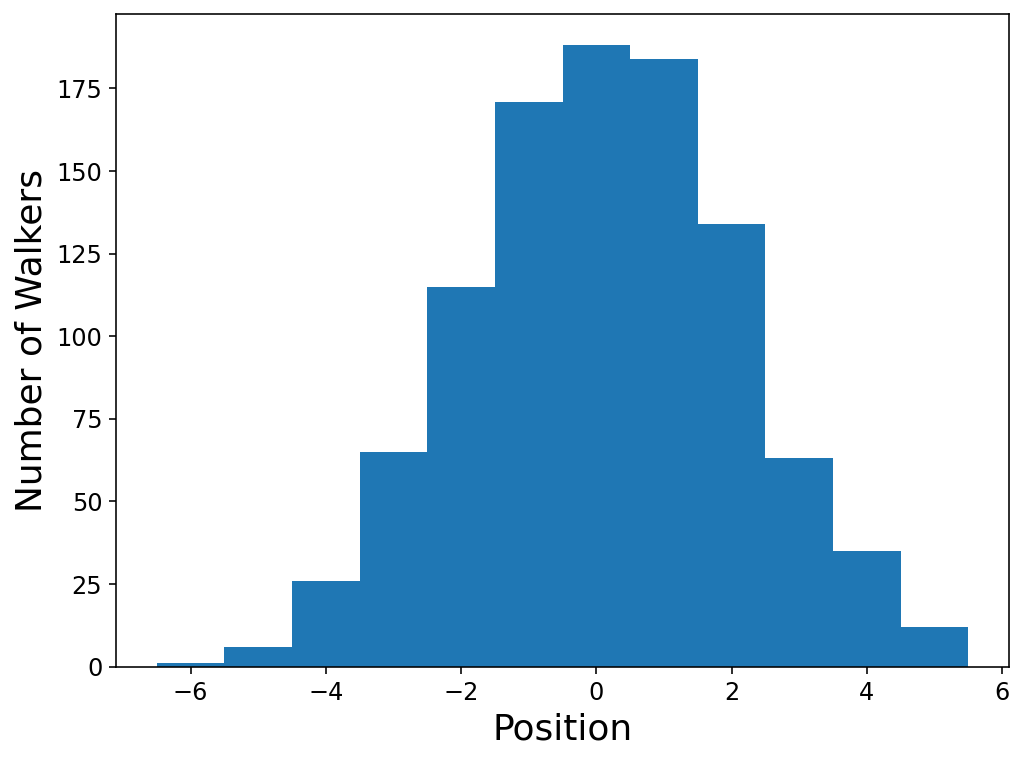

In [26]:
# bin edges that contain all walkers (bins centered on integers)
binEdges = np.arange(walkers.min(), walkers.max() + 2) - 0.5

plt.hist(walkers, bins=binEdges)
plt.xlabel('Position')
plt.ylabel('Number of Walkers');

The full simulation plus periodic visualization.

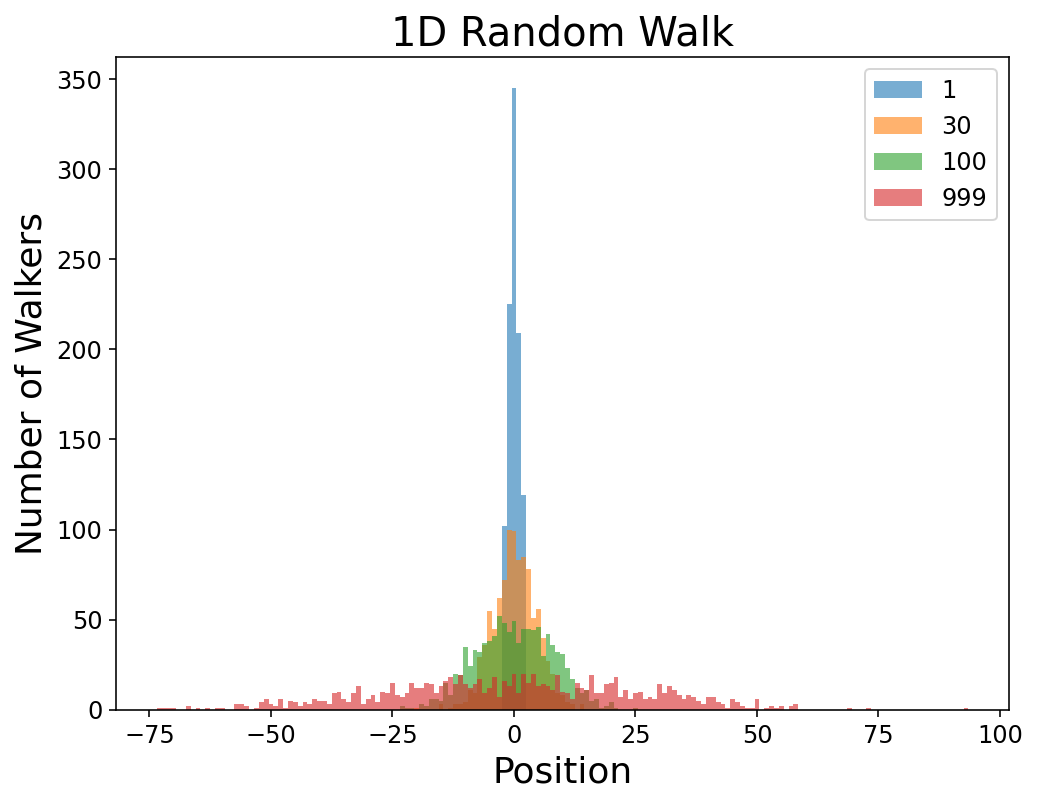

In [37]:
# simulate 1D random walkers
numWalkers = 1000
numTimeSteps = 1000
timeStepsToPlot = [1, 30, 100, 999]

# start all walkers at site 0
walkers = np.zeros(numWalkers, dtype=int)

# for each time step...
for t in range(numTimeSteps):
    
    # move walkers one time step
    walkers += np.random.choice([-1, 0, 1], size=walkers.shape)
    
    # plot walker distribution?
    if t in timeStepsToPlot:
        binEdges = np.arange(walkers.min(), walkers.max() + 2) - 0.5
        plt.hist(walkers, bins=binEdges, alpha=0.6, label=t)

plt.xlabel('Position')
plt.ylabel('Number of Walkers')
plt.title('1D Random Walk')
plt.legend();

## Exercise: Walker starting positions

Edit the 1D discrete random walk simulation below so that half the walkers start at position -10 and the other half start at position +10.

In [ ]:
# simulate 1D random walkers
numWalkers = 1000
numTimeSteps = 1000
timeStepsToPlot = [1, 30, 100, 999]

# all walkers at site 0
walkers = np.zeros(numWalkers, dtype=int)

# start half of the walkers at site -10 and the other half at site +10
...

# for each time step...
for t in range(numTimeSteps):
    
    # move walkers one time step
    walkers += np.random.choice([-1, 0, 1], size=walkers.shape)
    
    # plot walker distribution?
    if t in timeStepsToPlot:
        binEdges = np.arange(walkers.min(), walkers.max() + 2) - 0.5
        plt.hist(walkers, bins=binEdges, label=t)

plt.xlabel('Position')
plt.ylabel('Number of Walkers')
plt.title('1D Random Walk')
plt.legend();

## Get the positions of only those walkers at positive positions.

NumPy makes this easy with logical arrays.

In [38]:
isPositive = walkers > 0

isPositive[:9]

array([ True, False,  True, False,  True, False,  True,  True,  True])

We can use logical arrays to index into an array (i.e. we get only those values that align with True in the logical array).

In [39]:
posWalkers = walkers[isPositive]

posWalkers.shape

(483,)

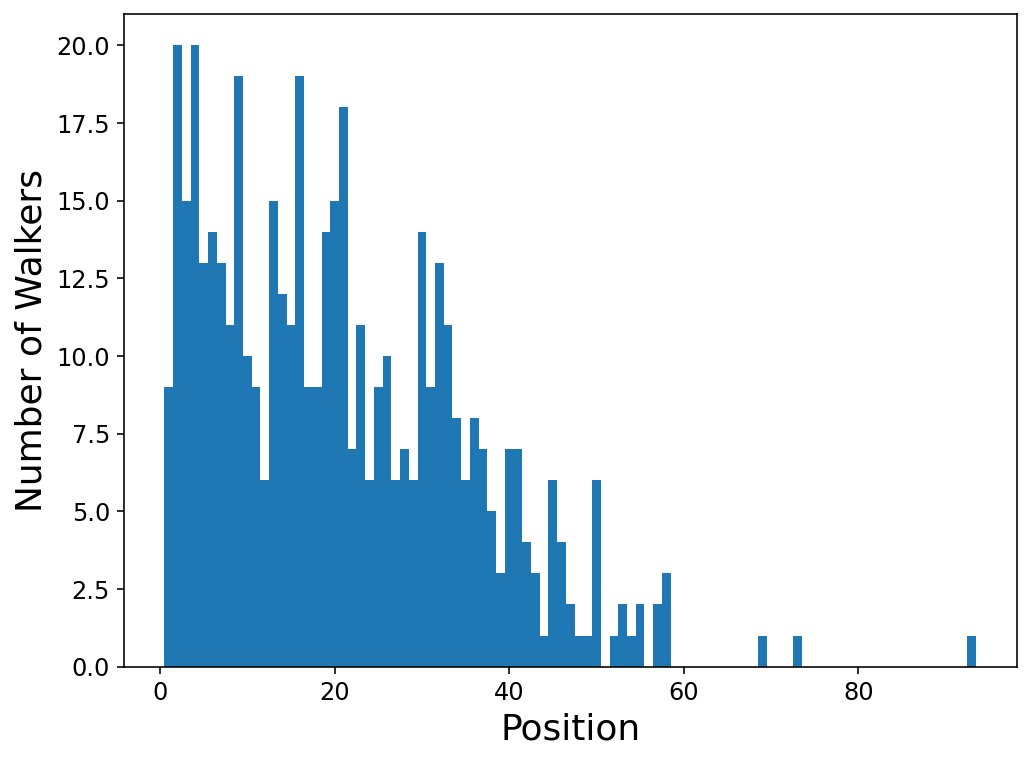

In [40]:
binEdges = np.arange(posWalkers.min(), posWalkers.max() + 2) - 0.5
plt.hist(posWalkers, bins=binEdges)
plt.xlabel('Position')
plt.ylabel('Number of Walkers');

## Flip all walkers at positive positions around zero.

We can use logical arrays to manipulate subsets of an array (i.e. only those values that align with True in the logical array).

In [41]:
walkers[isPositive] *= -1

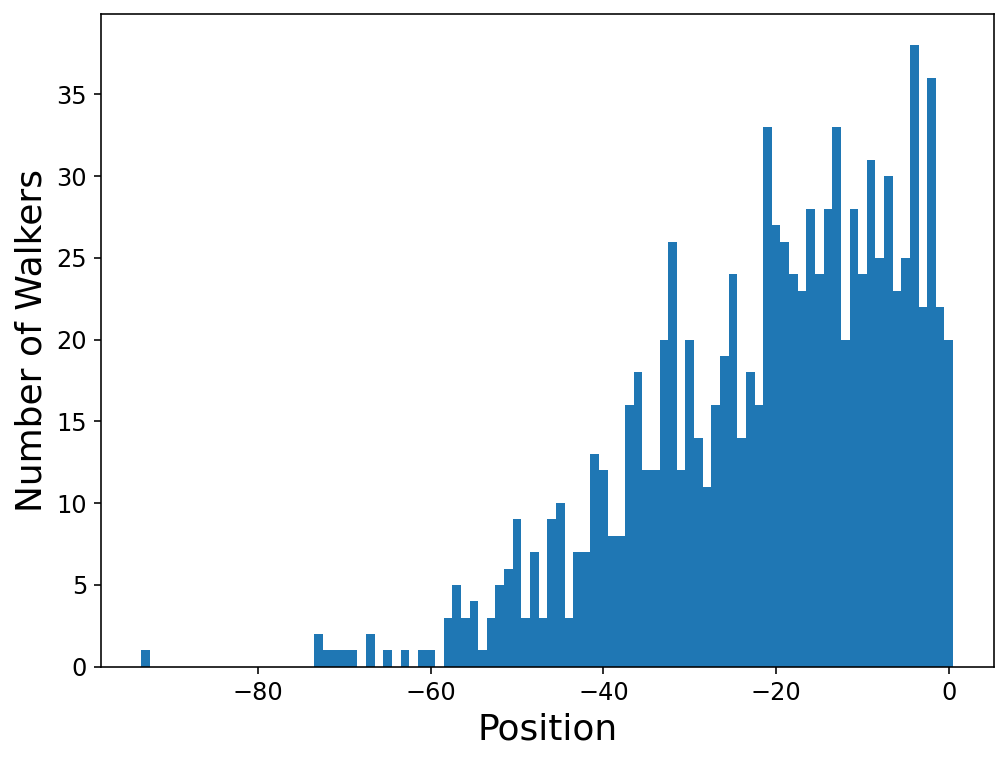

In [42]:
binEdges = np.arange(walkers.min(), walkers.max() + 2) - 0.5
plt.hist(walkers, bins=binEdges)
plt.xlabel('Position')
plt.ylabel('Number of Walkers');

## Exercise: Reflective boundaries

Edit the 1D discrete random walk below so that any walker attempting to move to a postion less than -25 is instead reflected back in the positive direction, and vice-versa for walkers attempting to move to a position greater than 25. i.e. a walker attempting to move to site -26 will instead move back to site -24, and a walker attempting to move to site 26 will instead move back to site 24.

In [ ]:
# simulate 1D random walkers with reflective boundaries
numWalkers = 1000
numTimeSteps = 1000
timeStepsToPlot = [1, 30, 100, 999]

# start all walkers at site 0
walkers = np.zeros(numWalkers, dtype=int)

# for each time step...
for t in range(numTimeSteps):
    
    # move walkers one time step
    walkers += np.random.choice([-1, 0, 1], size=walkers.shape)
    
    # reflect walkers off of boundaries
    ...
    
    # plot walker distribution?
    if t in timeStepsToPlot:
        binEdges = np.arange(walkers.min(), walkers.max() + 2) - 0.5
        plt.hist(walkers, bins=binEdges, label=t)

plt.xlabel('Position')
plt.ylabel('Number of Walkers')
plt.title('1D Random Walk with Reflective Boundaries')
plt.legend();

### But what if we want to keep track of the walker positions at all time steps?

We could use a 2D array where each row holds the position of all walkers for a single time step. The array will have as many rows as there are time steps and as many columns as there are walkers.

| | Walker 0 | Walker 1 | | Walker 999 |
| :- | :-: | :-: | :-: | :-: |
| **Time Step 0** | 0 | 0 | ... | 0 |
| **Time Step 1** | -1 | 1 | ... | -1 |
| | ... | ... | ... | ... |
| **Time Step 999** | 30 | -5 | ... | 7 |

With NumPy, we need to allocate the memory for the entire array upfront.

In [43]:
numWalkers = 1000
numTimeSteps = 1000

# array to hold walker positions at all time steps
walkers = np.zeros((numTimeSteps, numWalkers), dtype=int)

walkers.shape

(1000, 1000)

How would you refer to the positions of all walkers at time step 8?

In [44]:
walkers[8,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Thanks to NumPy, we can generate all of the random movements for all walkers across all time steps in one go!

In [45]:
jumps = np.random.choice([-1, 0, 1], size=walkers.shape)

jumps[:9,:9]

array([[ 1,  0,  1,  1,  0, -1, -1, -1,  1],
       [ 0,  1,  0, -1,  0, -1,  0,  0,  0],
       [ 1,  0,  1,  1, -1,  0, -1,  1, -1],
       [ 1,  1,  0,  1, -1,  0, -1, -1, -1],
       [ 1,  0, -1,  0, -1, -1,  0, -1,  1],
       [ 1,  0,  1, -1,  1,  0,  1,  1, -1],
       [ 1,  0,  1,  0, -1, -1,  1, -1,  1],
       [-1,  1,  1,  1,  1,  1,  1,  0, -1],
       [ 1,  0,  0,  1,  1,  1,  1,  0, -1]])

A simple simulation one time step at a time.

In [46]:
for t in range(1, numTimeSteps):
    walkers[t,:] = walkers[t-1,:] + jumps[t,:]

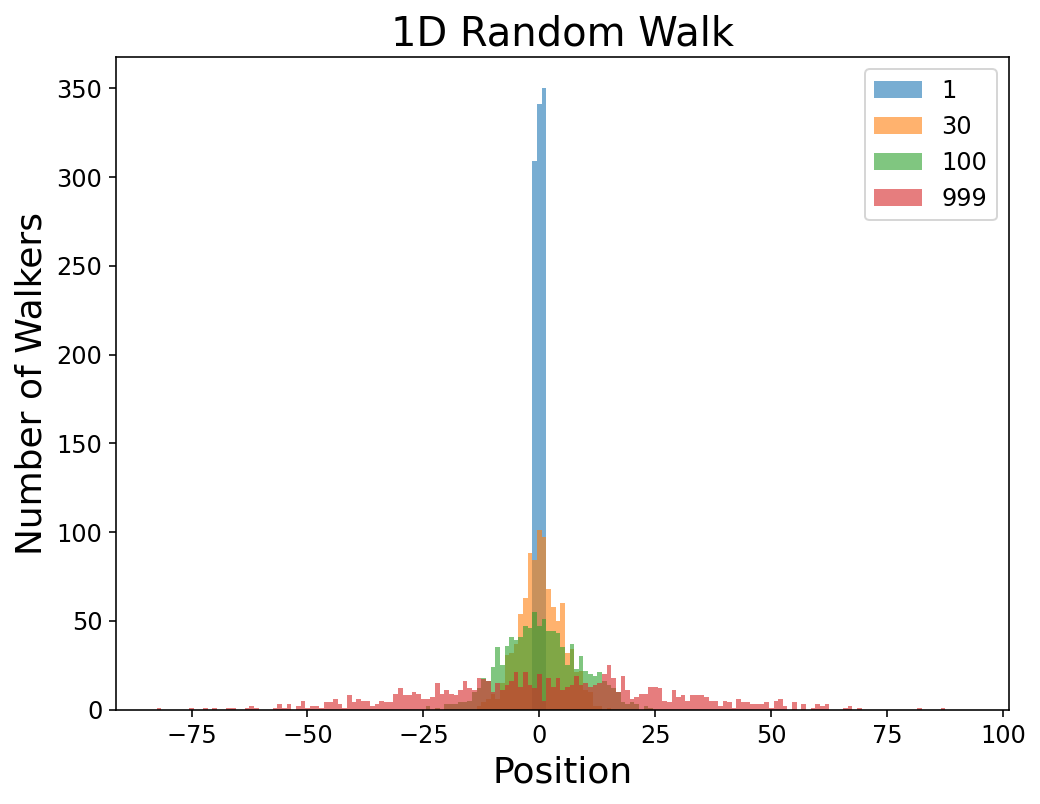

In [48]:
# visualize simulation
binEdges = np.arange(walkers.min(), walkers.max() + 2) - 0.5

for t in [1, 30, 100, 999]:
    plt.hist(walkers[t,:], bins=binEdges, alpha=0.6, label=t)     

plt.xlabel('Position')
plt.ylabel('Number of Walkers')
plt.title('1D Random Walk')
plt.legend();

The entire simulation is even easier if we realize that the walker positions are just the cumulative sum of ther jumps.

In [49]:
jumps[:9,:9]

array([[ 1,  0,  1,  1,  0, -1, -1, -1,  1],
       [ 0,  1,  0, -1,  0, -1,  0,  0,  0],
       [ 1,  0,  1,  1, -1,  0, -1,  1, -1],
       [ 1,  1,  0,  1, -1,  0, -1, -1, -1],
       [ 1,  0, -1,  0, -1, -1,  0, -1,  1],
       [ 1,  0,  1, -1,  1,  0,  1,  1, -1],
       [ 1,  0,  1,  0, -1, -1,  1, -1,  1],
       [-1,  1,  1,  1,  1,  1,  1,  0, -1],
       [ 1,  0,  0,  1,  1,  1,  1,  0, -1]])

In [50]:
np.cumsum(jumps[:9,:9], axis=0)

array([[ 1,  0,  1,  1,  0, -1, -1, -1,  1],
       [ 1,  1,  1,  0,  0, -2, -1, -1,  1],
       [ 2,  1,  2,  1, -1, -2, -2,  0,  0],
       [ 3,  2,  2,  2, -2, -2, -3, -1, -1],
       [ 4,  2,  1,  2, -3, -3, -3, -2,  0],
       [ 5,  2,  2,  1, -2, -3, -2, -1, -1],
       [ 6,  2,  3,  1, -3, -4, -1, -2,  0],
       [ 5,  3,  4,  2, -2, -3,  0, -2, -1],
       [ 6,  3,  4,  3, -1, -2,  1, -2, -2]])

In [51]:
numWalkers = 1000
numTimeSteps = 1000

# array to hold walker positions at all time steps
walkers = np.zeros((numTimeSteps, numWalkers), dtype=int)

# jumps for all walkers and all time steps after the the first
jumps = np.random.choice([-1, 0, 1], size=(numTimeSteps-1, numWalkers))

# positions are just cummulative sum of jumps
walkers[1:,:] = np.cumsum(jumps, axis=0)

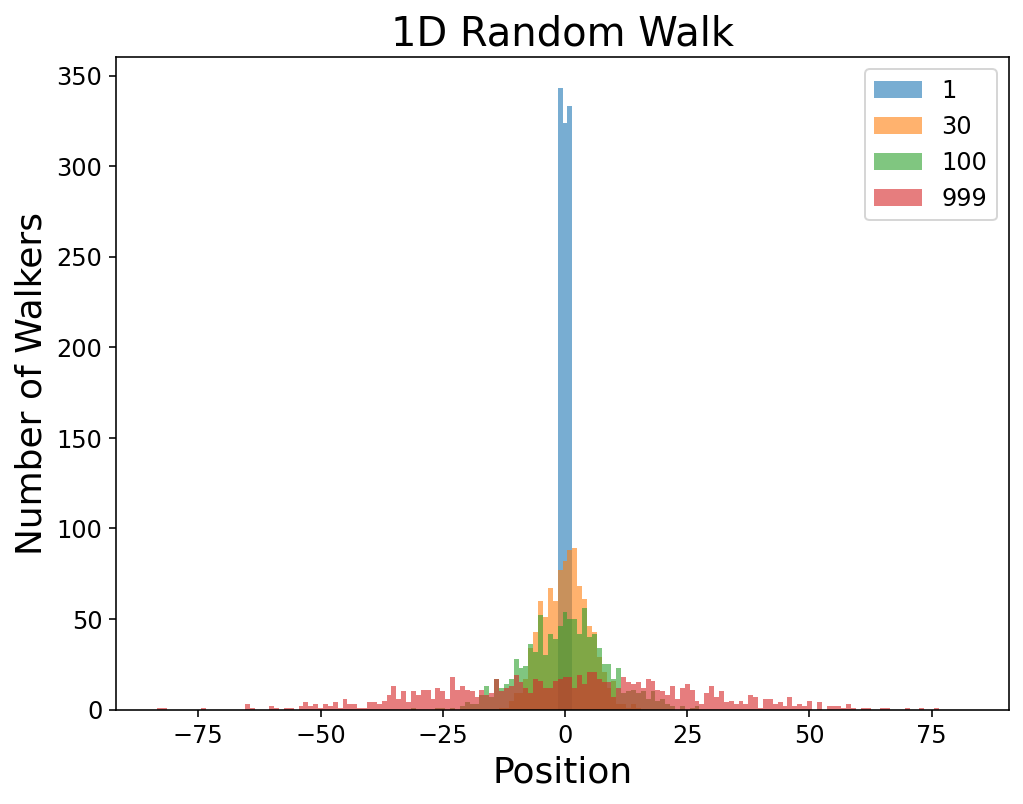

In [52]:
# visualize simulation
binEdges = np.arange(walkers.min(), walkers.max() + 2) - 0.5

for t in [1, 30, 100, 999]:
    plt.hist(walkers[t,:], bins=binEdges, alpha=0.6, label=t)     

plt.xlabel('Position')
plt.ylabel('Number of Walkers')
plt.title('1D Random Walk')
plt.legend();

## 2D discrete random walk

![](images/random-walk-2d.gif)

* Discrete integer sites
* 9000 identical and independent random walkers
* All walkers start at site 0
* Every time step each walker randomly moves -1, 0, or +1 sites in both x and y dimensions

How will you store the 2D positions of all walkers for all time steps?

    axis 0, i = time step
    axis 1, j = walker
    axis 2, k = dimension (x,y)

![](images/walkers2d-matrix.png)

In [55]:
numWalkers = 9000
numTimeSteps = 1000

walkers = np.zeros((numTimeSteps, numWalkers, 2), dtype=int)

walkers.shape

(1000, 9000, 2)

walkers[:,:,0] = X positions

| X | Walker 0 | Walker 1 | | Walker 999 |
| :- | :-: | :-: | :-: | :-: |
| **Time Step 0** | 0 | 0 | ... | 0 |
| **Time Step 1** | -1 | 1 | ... | -1 |
| | ... | ... | ... | ... |
| **Time Step 999** | 30 | -5 | ... | 7 |

walkers[:,:,1] = Y positions

| Y | Walker 0 | Walker 1 | | Walker 999 |
| :- | :-: | :-: | :-: | :-: |
| **Time Step 0** | 0 | 0 | ... | 0 |
| **Time Step 1** | -1 | 0 | ... | 1 |
| | ... | ... | ... | ... |
| **Time Step 999** | 2 | 14 | ... | -9 |

What is the (x,y) position of walker 3 at time step 11?

In [56]:
walkers[11,3,:]

array([0, 0])

What are the (x,y) positions of walker 3 for all time steps?

In [57]:
walkers[:,3,:].shape

(1000, 2)

In [58]:
walkers[:5,3,:]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

## Exercise: 2D random walk

* Discrete integer sites
* 1000 identical and independent random walkers
* All walkers start at site 0
* Every time step each walker randomly moves -1, 0, or +1 sites in both x and y dimensions

Write a program that simulates the above for 1000 time steps.

*You don't have to plot anything yet.*

In [ ]:
numWalkers = 9000
numTimeSteps = 1000

walkers = np.zeros((numTimeSteps, numWalkers, 2), dtype=int)

# finish the program...


## Plot a 2D histogram as a colormap

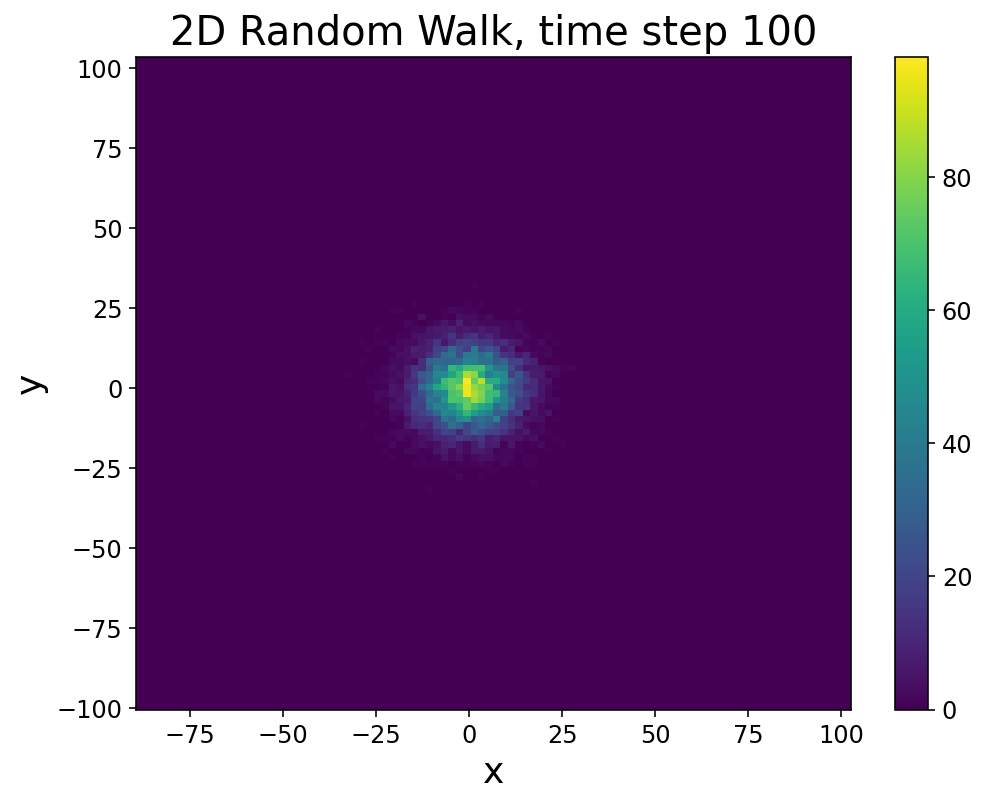

In [84]:
# 2d histogram of walker positions
allx = walkers[:,:,0]
ally = walkers[:,:,1]
binEdgesX = np.arange(allx.min(), allx.max() + 2, 2) - 0.5
binEdgesY = np.arange(ally.min(), ally.max() + 2, 2) - 0.5

t = 100  # time step to visualize
x = walkers[t,:,0]
y = walkers[t,:,1]
plt.hist2d(x, y, bins=(binEdgesX, binEdgesY))     
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'2D Random Walk, time step {t}')
plt.colorbar();

Change the code above to visualize several time steps during the simulation.

## Arrays of subplots

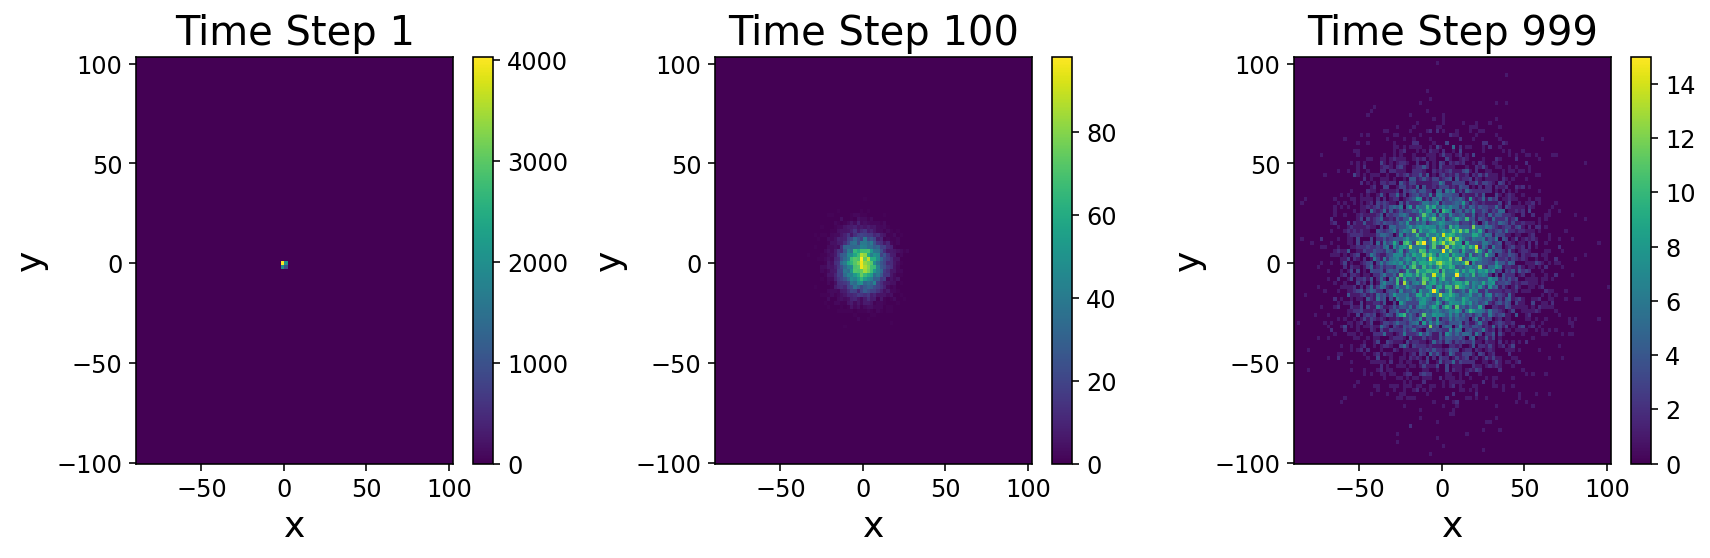

In [85]:
# visualize multiple time steps in an array
plt.figure(figsize=(12,4))
for i, t in enumerate([1, 100, 999]):
    x = walkers[t,:,0]
    y = walkers[t,:,1]
    plt.subplot(1, 3, i+1)
    plt.hist2d(x, y, bins=(binEdgesX, binEdgesY))     
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Time Step {t}')
    plt.colorbar();
plt.tight_layout()

Plot the trajectory of walker 3.

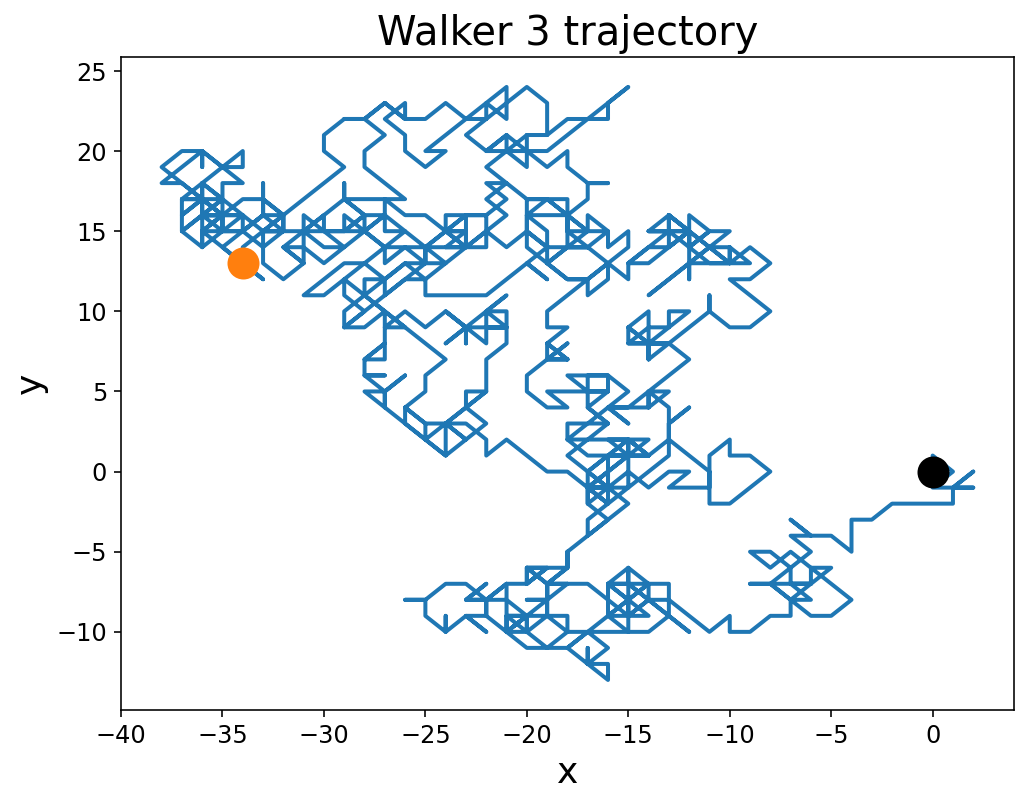

In [86]:
x = walkers[:,3,0]
y = walkers[:,3,1]

plt.plot(x, y, lw=2)
plt.plot(x[0], y[0], marker='o', ms=15, color='black')
plt.plot(x[-1], y[-1], marker='o', ms=15)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Walker 3 trajectory');

## Why does diffusion occur?

What do random walks tell us about diffusion?

![Diffusion](images/diffusion.jpg)

## Diffusion in neural signaling

![Diffusion](images/synapse.png)

## Exercise

Repeat the 2D discrete random walk above, but include reflective boundaries at x=-25 and x=+25 so that all walkers remain within these bounds in x. Note the walkers are still free to go wherever in y.

In [ ]:
# simulate 2D random walk with reflective boundaries
numWalkers = 9000
numTimeSteps = 1000

walkers = np.zeros((numTimeSteps, numWalkers, 2), dtype=int)

# finish the program...

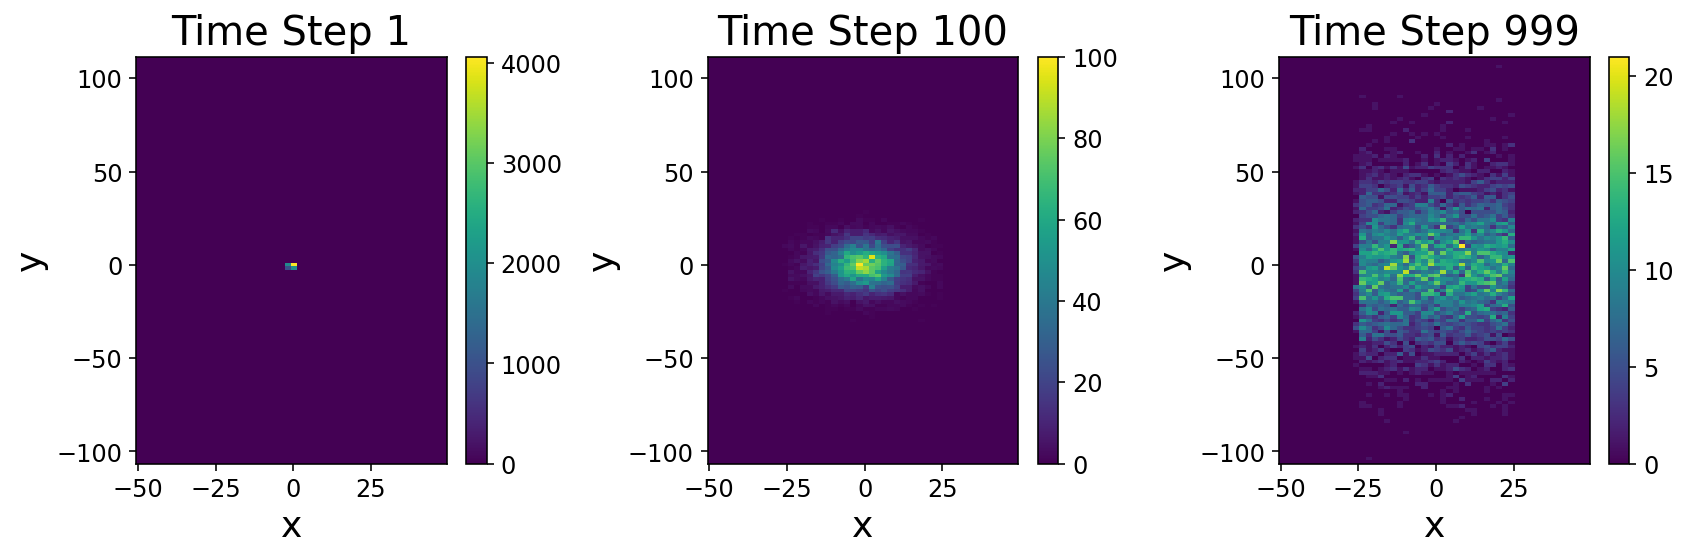

In [89]:
# visualize multiple time steps in an array
ally = walkers[:,:,1]
binEdgesX = np.arange(-50, 52, 2) - 0.5
binEdgesY = np.arange(ally.min(), ally.max() + 2, 2) - 0.5

plt.figure(figsize=(12,4))
for i, t in enumerate([1, 100, 999]):
    x = walkers[t,:,0]
    y = walkers[t,:,1]
    plt.subplot(1, 3, i+1)
    plt.hist2d(x, y, bins=(binEdgesX, binEdgesY))     
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Time Step {t}')
    plt.colorbar();
plt.tight_layout()